In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Garbage collector para optimizar recursos
import gc

In [2]:
# Importamos dataset de desarrollo
data_dev = pd.read_json("dataset_amazon/dataset_es_dev.json", lines = True)
print("- Cantidad de filas del set de desarrollo:", data_dev.shape[0])

# Importamos dataset de entrenamiento
data_train = pd.read_json("dataset_amazon/dataset_es_train.json", lines = True)
print("- Cantidad de filas del set de entrenamiento:", data_train.shape[0])

# Importamos dataset de prueba
data_test = pd.read_json("dataset_amazon/dataset_es_test.json", lines = True)
print("- Cantidad de filas del set de prueba:", data_test.shape[0])

- Cantidad de filas del set de desarrollo: 5000
- Cantidad de filas del set de entrenamiento: 200000
- Cantidad de filas del set de prueba: 5000


In [3]:
# Concatenamos todos
data = pd.concat([data_dev,data_train,data_test])
data = data.reset_index(drop=True)

In [2]:
data = pd.read_json("dataset_amazon/dataset_es_train.json", lines = True)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [3]:
data.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy
199999,es_0859809,product_es_0378794,reviewer_es_0141717,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,es,home


In [7]:
data.shape

(200000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [9]:
data.product_category.value_counts()

home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery       

In [24]:
# Ver cantidad de usuarios que valoraron con cada número estrellas las distintas categorías
# data_grouped = data.review_id.groupby([data['product_category'],data['stars']]).count().astype(int).reset_index(name='count')
from statistics import mean
data_grouped = data.stars.groupby([data['product_category']]).mean().reset_index(name='avg_stars')
data_grouped['rev_count'] = data.stars.groupby([data['product_category']]).count().astype(int).reset_index(name='rev_count').rev_count
data_grouped.sort_values(by='avg_stars')

,product_category,avg_stars,rev_count
16,lawn_and_garden,2.773189,4237
29,wireless,2.821834,25886
0,apparel,2.866829,5737
8,electronics,2.887626,10385
14,jewelry,2.930538,1598
3,beauty,2.935805,7337
1,automotive,2.950721,7143
11,home,2.980380,26962
23,pet_products,2.991112,3713
28,watch,3.001342,1490


In [30]:
data_grouped = data.review_id.groupby([data['product_category'],data['stars']]).count().astype(int).reset_index(name='count')
data_grouped

,product_category,stars,count
0,apparel,1,1273
1,apparel,2,1205
2,apparel,3,1200
3,apparel,4,1131
4,apparel,5,928
...,...,...,...
145,wireless,1,6283
146,wireless,2,5684
147,wireless,3,4797
148,wireless,4,4606


In [79]:
data.stars.value_counts()

1    40000
2    40000
3    40000
4    40000
5    40000
Name: stars, dtype: int64

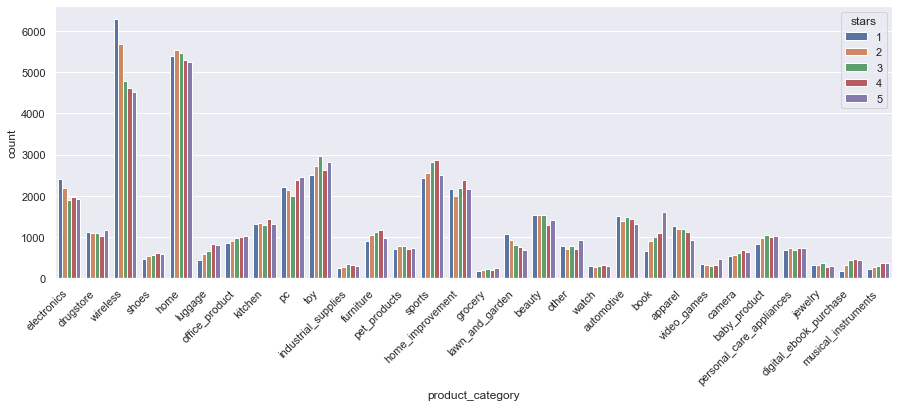

In [32]:
# 
#data_grouped.sort_values(['rev_count','avg_stars'],ascending=False,inplace=True)
plt.figure(figsize=(15,5))
grafico = sns.countplot(x=data['product_category'],data=data, hue='stars')
#grafico = sns.barplot(x=data_grouped.product_category, y=data_grouped.rev_count, linewidth=1,edgecolor=(0,0,0))
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [49]:
# Ver cuántos usuarios únicos publicaron
unique_usrs = len(data.reviewer_id.unique())
print("De las", data.shape[0],"reseñas, sólo", unique_usrs, "fueron hechas por usuarios únicos.")
print("Esto equivale al", unique_usrs/data.shape[0]*100,"%")

De las 200000 reseñas, sólo 179076 fueron hechas por usuarios únicos.
Esto equivale al 89.538 %


In [50]:
# Ver sobre cuántos productos únicos se publicaron reseñas
unique_prods = len(data.product_id.unique())
print("De las", data.shape[0],"reseñas, sólo se mencionan", unique_prods , "productos únicos.")
print("Esto equivale al", unique_prods/data.shape[0]*100,"%")

De las 200000 reseñas, sólo se mencionan 150938 productos únicos.
Esto equivale al 75.469 %


In [59]:
# Vemos las reseñas de un solo usuario
rand_idx = np.random.randint(0,data.shape[0])
usr = data.reviewer_id.iloc[rand_idx]
usr_data = data[data.reviewer_id == usr]
print("Cantidad de reseñas del usuario", usr,":", len(usr_data))
print("Promedio de estrellas que ha dado:", usr_data.stars.mean())
usr_data[['reviewer_id','product_category','review_title','review_body','stars']]

Cantidad de reseñas del usuario reviewer_es_0468858 : 1
Promedio de estrellas que ha dado: 3.0


,reviewer_id,product_category,review_title,review_body,stars
108594,reviewer_es_0468858,automotive,Bien por lo que vale.,Está bien teniendo en cuenta su precio. El plá...,3


In [4]:
# Previamente
## python -m spacy download es
## python -m spacy download es_core_news_sm

import spacy # https://spacy.io/usage/models
nlp = spacy.load('es_core_news_sm')

#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)
# Quitamos palabras como 'no', 'bueno', 'buena' que nos pueden ser últiles para predecir
stopwords_spacy.remove('no')
stopwords_spacy.remove('bueno')
stopwords_spacy.remove('buena')

In [5]:
#Stop Words de nltk
import nltk
from nltk.corpus import stopwords
stopwords_nltk = set(stopwords.words('spanish'))
stopwords_nltk.remove('no')

**Stopwords de spaCy:** https://github.com/explosion/spaCy/blob/master/spacy/lang/es/stop_words.py
<br> vs<br>
**Stopwords de NLTK:** https://github.com/Alir3z4/stop-words/blob/bd8cc1434faeb3449735ed570a4a392ab5d35291/spanish.txt

Está bastante mejor el de NLTK porque spaCy tiene palabras como "bueno" y "bien"

In [6]:
# Nos quedamos con las columnas del dataset que son relevantes para predecir la valoración en general
# Por eso se descartan las columnas de id de usuario y producto
# La de categoría nos puede servir para relacionar palabras
# La del idioma es redundante
df = data[['product_category','review_title','review_body','stars']]
df.head()

,product_category,review_title,review_body,stars
0,wireless,Mala compra,"Malisimo, muy grande demasiado aparatoso y mal...",1
1,apparel,No lo he recibido,No he recibido el pedido no la devolución,1
2,sports,Que no aprieta bien en el manillar,"Tengo que buscar otro sistema, este no funcion...",1
3,home_improvement,Brocas de mantequilla,Utilicé las brocas de menor diámetro y se me d...,1
4,beauty,No me gusta,No me gusta su olor a viejo y aspecto malo,1


In [88]:
# Miramos una review al azar
random_index = np.random.randint(0,df.shape[0])
review = df.review_body.iloc[random_index]
title = df.review_title.iloc[random_index]
print(random_index, title, '\n',review)
print('Puntuación:',df.stars[random_index])
print('Categoría:', df.product_category[random_index])

135750 Segura y funcional Segura, buen diseño y relación calidad-precio. Únicamente deberían mejorar las instrucciones, difícil montaje


In [12]:
#Constante de signos de puntuación
#import string
#puntua = string.punctuation + '¡¿'

#Función para limpieza de datos
def text_data_lemma_2(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [101]:
clean_review = text_data_lemma(review)
clean_review

['Segura',
 'diseño',
 'y',
 'relación',
 'calidad-precio',
 'únicamente',
 'deber',
 'mejorar',
 'instrucción',
 'difícil',
 'montaje']

In [100]:
# Pasar todo a minúscula y quitar lo que no sea texto o espacio
import re
review_sin_punct = re.sub("[^a-zA-ZáéíóúÁÉÍÓÚÑñüÜ]", " ", str(review.lower())) # re.sub(pattern, repl, string, count=0, flags=0) --> Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl.
title_sin_punct = re.sub("[^a-zA-ZáéíóúÁÉÍÓÚÑñüÜ]", " ", str(title.lower()))
print(title_sin_punct,'\n',review_sin_punct,'\n')

# Tokenizar
doc = nlp(title_sin_punct + ' ' + review_sin_punct)
# print(doc)
rev = []
for token in doc:
    if(str(token) not in stopwords_spacy):
        rev.append(token)
        print(token)

segura y funcional 
 segura  buen diseño y relación calidad precio  únicamente deberían mejorar las instrucciones  difícil montaje 

segura
y
funcional
segura
 
diseño
y
relación
calidad
precio
 
únicamente
deberían
mejorar
instrucciones
 
difícil
montaje


In [97]:
# Lemmatización
rev_lemma = []
rev_lemma = [w.lemma_ for w in rev if not w.pos_ == 'SPACE'] # Lemmatizamos y filtramos espacios
rev_lemma

# rev_lemma.clear()

['seguro',
 'funcional',
 'seguro',
 'buen',
 'diseño',
 'relación',
 'calidad',
 'precio',
 'únicamente',
 'deber',
 'mejorar',
 'instrucción',
 'difícil',
 'montaje']

In [ ]:
# Quitamos palabras duplicadas si las hubiera
[res.append(x) for x in test_list if x not in res] 

In [10]:
# Cómo clasifica palabras lunfardas que pueden aparecer
palabra = 'fachero buenardo flashero flasheado cool malisimo malísimo malardo mina flasherísimo flasherisimo chavon'
palabra = nlp(palabra)
palabras_lunfardas = []
for t in palabra:
    print(t," - ",t.lemma_, " - ", t.pos_)
    palabras_lunfardas.append(t)
palabras_lunfardas


fachero  -  fachero  -  NOUN
buenardo  -  buenardo  -  ADJ
flashero  -  flashero  -  ADJ
flasheado  -  flasheado  -  ADJ
cool  -  cool  -  NOUN
malisimo  -  malisimo  -  ADJ
malísimo  -  malísimo  -  ADJ
malardo  -  malardo  -  ADJ
mina  -  mina  -  NOUN
flasherísimo  -  flasherísimo  -  ADJ
flasherisimo  -  flasherisimo  -  ADJ
chavon  -  chavon  -  NOUN


[fachero,
 buenardo,
 flashero,
 flasheado,
 cool,
 malisimo,
 malísimo,
 malardo,
 mina,
 flasherísimo,
 flasherisimo,
 chavon]

In [82]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')

In [9]:
data_star_1 = data[data['stars']==1]
data_star_2 = data[data['stars']==2]
data_star_3 = data[data['stars']==3]
data_star_4 = data[data['stars']==4]
data_star_5 = data[data['stars']==5]

In [84]:
todas_reviews_1 = []
for i in data_star_1.index:
    review1 = data_star_1.review_body[i] #seleccionar el titular
    review1 = RegexpTokenizer('\w+').tokenize(review1) # Tokenizar con RegexpTokenizer
    review1 = [w.lower() for w in review1 if w not in stopwords] # Filtrar por stopwords
    review1 = [w.lower() for w in review1 if len(w)>3 or w=='no' ] # Filtrar a las que tienen menos de 3 caracteres, salvo el 'no'
    todas_reviews_1.append(review1) #agregar el resultado a la lista

print('Cantidad de palabras filtradas:',len(todas_reviews_1))
todas_reviews_1[:3]

Cantidad de palabras filtradas: 40000


[['nada',
  'bueno',
  'pantalla',
  'menos',
  'meses',
  'no',
  'recibido',
  'respuesta',
  'fabricante'],
 ['horrible',
  'comprar',
  'sabemos',
  'inglés',
  'informático',
  'después',
  'hora',
  'capaz',
  'instalarlo'],
 ['obligan',
  'comprar',
  'unidades',
  'llega',
  'solo',
  'no',
  'forma',
  'reclamar',
  'autentica',
  'estafa',
  'no',
  'compreis']]

In [85]:
# Esta celda convierte una lista de listas en una unica lista
import itertools
plain_todas_reviews_1 = list(itertools.chain(*todas_reviews_1))
plain_todas_reviews_1[0:10]

['nada',
 'bueno',
 'pantalla',
 'menos',
 'meses',
 'no',
 'recibido',
 'respuesta',
 'fabricante',
 'horrible']

In [86]:
freq_rev_1 = nltk.FreqDist(plain_todas_reviews_1)
freq_rev_1

FreqDist({'no': 47970, 'producto': 7219, 'bien': 4448, 'calidad': 4349, 'llegado': 3422, 'recomiendo': 2812, 'amazon': 2749, 'mala': 2587, 'funciona': 2582, 'solo': 2537, ...})

In [87]:
print('Cantidad de palabras luego de aplanar:', len(plain_todas_reviews_1))

Cantidad de palabras luego de aplanar: 543902


In [91]:
df_revs_1 = pd.DataFrame(freq_rev_1.items(), columns = ['Palabra', 'Frecuencia']) 
df_revs_1.sort_values(by=['Frecuencia'], inplace=True, ascending=False)
df_revs_1.reset_index(drop = True, inplace=True)
df_revs_1.head()

,Palabra,Frecuencia
0,no,47970
1,producto,7219
2,bien,4448
3,calidad,4349
4,llegado,3422


In [90]:
df_revs_1[df_revs_1['Frecuencia']<10]

,Palabra,Frecuencia
2725,desgastada,9
1601,habituales,9
10840,viajes,9
9782,notch,9
9800,pilla,9
...,...,...
17075,inmoviliza,1
17079,alucino,1
17080,atora,1
17081,pondremos,1


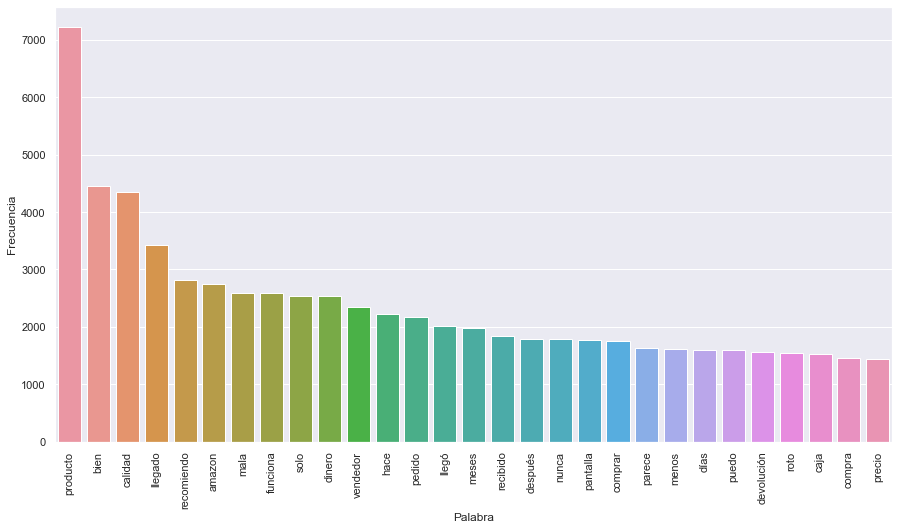

In [93]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_revs_1.iloc[1:30].Palabra, y = df_revs_1.iloc[1:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [ ]:
def word_frecquency_df(dataframe):
    todas_reviews = []
    for i in dataframe.index:
        review1 = dataframe.review_body[i] #seleccionar el titular
        review1 = RegexpTokenizer('\w+').tokenize(review1) # Tokenizar con RegexpTokenizer
        review1 = [w.lower() for w in review1 if w not in stopwords_spacy] # Filtrar por stopwords
        review1 = [w for w in review1 if len(w)>3 ] # Filtrar a las que tienen menos de 3 caracteres, salvo el 'no'
        todas_reviews.append(review1) # Agregar el resultado a la lista
    plain_todas_reviews = list(itertools.chain(*todas_reviews)) # Aplanar la lista
    freq_revs = nltk.FreqDist(plain_todas_reviews) # Obtener frecuencia por palabra
    df_revs = pd.DataFrame(freq_revs.items(), columns = ['Palabra', 'Frecuencia']) # Crear nuevo df
    df_revs.sort_values(by=['Frecuencia'], inplace=True, ascending=False) # Ordenar valores por frecuencia
    df_revs.reset_index(drop = True, inplace=True) # Resetear index
    return df_revs

## Vectorization Feature Engineering (TF-IDF)

In [36]:
train_data = pd.read_json("dataset_amazon/dataset_es_train.json", lines = True)
train_df = train_data[['product_category','review_title','review_body','stars']]
# df.head()
test_data = pd.read_json("dataset_amazon/dataset_es_test.json", lines = True)
test_df = test_data[['product_category','review_title','review_body','stars']]
# df.head()

In [40]:
print("- Cantidad de filas total del set de entrenamiento:", train_df.shape[0])
print("- Cantidad de filas nulas por columna:")
train_df.isna().sum()

- Cantiudad de filas total del set de entrenamiento: 200000
- Cantiudad de filas nulas por columna:


product_category    0
review_title        0
review_body         0
stars               0
dtype: int64

In [41]:
print("- Cantidad de filas total del set de prueba:", test_df.shape[0])
print("- Cantidad de filas nulas por columna:")
test_df.isna().sum()

- Cantiudad de filas total del set de prueba: 5000
- Cantiudad de filas nulas por columna:


product_category    0
review_title        0
review_body         0
stars               0
dtype: int64

Como el set de prueba es muy menor al set de entrenamiento (representa un 2,5% de los datos), vamos a juntar ambos datasets y con el `train_test_split` tomar un 30% para *test*.

Además, esto permite reducir la carga de entrenamiento.

In [50]:
df = pd.concat([train_df,test_df])
df.reset_index().tail()

,index,product_category,review_title,review_body,stars
204995,4995,wireless,Perfectos para lo que sirven,Para lo que cuesta es perfecto porque cumple s...,5
204996,4996,wireless,"Buen vendedor, rápido y fiable.","Material muy flexible y cómodo, acorde a la de...",5
204997,4997,home,medallas con bonito grabado,Se ve bien el grabado,5
204998,4998,sports,timbre,lo compré para mi bici pero finalmente se lo h...,5
204999,4999,electronics,Auriculares sin cables de verdad,Pues este tipo de cascos si que son inalambric...,5


### Tokenizacion y lemmatizacion

In [41]:
# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import SnowballStemmer
from nltk.stem.snowball import SpanishStemmer # Permite stemmizar palabras en español
#print(" ".join(SpanishStemmer.languages)) # Ver idiomas soportados

In [43]:
stemmer = SpanishStemmer()

In [33]:
#Constante de signos de puntuación
import string
puntua = string.punctuation + '¡¿...'
excluded_pos = ['SCONJ','CCONJ','NUM','PUNCT','PRON','DET','ADP','AUX','X']

In [34]:
#Función para limpieza de datos con lemmatizer
def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [35]:
#Función para limpieza de datos con stemmer
def text_data_stem(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy): 
            temp = stemmer.stem(token.text).strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [28]:
# Miramos una review al azar
random_index = np.random.randint(0,df.shape[0])
review = df.review_body.iloc[random_index]
title = df.review_title.iloc[random_index]
print(random_index, title, '\n',review)
print('- Valoración:',df.stars[random_index])
print('- Categoría:', df.product_category[random_index])

188352 Perfecto 
 Lo uso para una tortuga ya bastante grande y la verdad es que el agua está siempre impecable. Lo limpio una vez a la semana. Es muy fácil y cómodo de limpiar
- Valoración: 5
- Categoría: pet_products


In [44]:
sent = nlp(review)
for token in sent:
    print(token,"-",token.pos_,"-",stemmer.stem(token.text))

Lo - PRON - lo
uso - ADJ - uso
para - ADP - par
una - DET - una
tortuga - NOUN - tortug
ya - ADV - ya
bastante - ADV - bastant
grande - ADJ - grand
y - CCONJ - y
la - DET - la
verdad - NOUN - verd
es - AUX - es
que - SCONJ - que
el - DET - el
agua - NOUN - agu
está - AUX - esta
siempre - ADV - siempr
impecable - ADJ - impec
. - PUNCT - .
Lo - PRON - lo
limpio - ADJ - limpi
una - DET - una
vez - NOUN - vez
a - ADP - a
la - DET - la
semana - NOUN - seman
. - PUNCT - .
Es - AUX - es
muy - ADV - muy
fácil - ADJ - facil
y - CCONJ - y
cómodo - ADJ - comod
de - ADP - de
limpiar - VERB - limpi


In [52]:
stemmer.stem("verdad")

'verd'

In [42]:
# Train_test_split
from sklearn.model_selection import train_test_split

In [55]:
# Limpiamos todas las reviews con stemmer/lemmatizer
clean_reviews = []
for i in df.index:
    rev = text_data_stem(df.review_title.iloc[i] + ' ' + df.review_body.iloc[i])
    # rev = text_data_lemma(df.review_title.iloc[i] + ' ' + df.review_body.iloc[i])
    clean_reviews.append(" ".join(rev))
clean_reviews[:5]

['mal compr malisim grand aparat protector pantall',
 'no recib no recib ped no devolu',
 'no apriet manill teng busc sistem no funcion abrazader agarr manill no apriet desliz lintern abaj',
 'broc mantequill utilic broc menor diametr dobl fues mantequill minim presion dobl enderez part exterior amarill interior fund gris compr',
 'no gust no gust olor viej aspect mal']

In [18]:
clean_revs = []
for rev in clean_reviews:
    clean_revs.append(" ".join(rev))
clean_revs[:5]

['malo compro malisimo grande aparatoso protector pantalla',
 'no recibir no recibir pedido no devolución',
 'no apretar manillar tener buscar sistema no funcionar abrazadera agarrar manillar no apretar deslizar linterna abajo',
 'brocas mantequilla utilicé broca menor diámetro doblar ser mantequilla mínimo presión doblado enderezarla partir exteriormente amarillo interior fundido gris compra',
 'no gustar no gustar olor viejo aspecto malo']

In [57]:
# Agregamos columna al dataset
#df.drop(columns=['clean_rev'], inplace=True)
df['clean_revs'] = clean_reviews
df.head()

<ipython-input-57-cff57c63c042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_revs'] = clean_reviews


,product_category,review_title,review_body,stars,clean_revs
0,wireless,Mala compra,"Malisimo, muy grande demasiado aparatoso y mal...",1,mal compr malisim grand aparat protector pantall
1,apparel,No lo he recibido,No he recibido el pedido no la devolución,1,no recib no recib ped no devolu
2,sports,Que no aprieta bien en el manillar,"Tengo que buscar otro sistema, este no funcion...",1,no apriet manill teng busc sistem no funcion a...
3,home_improvement,Brocas de mantequilla,Utilicé las brocas de menor diámetro y se me d...,1,broc mantequill utilic broc menor diametr dobl...
4,beauty,No me gusta,No me gusta su olor a viejo y aspecto malo,1,no gust no gust olor viej aspect mal


In [58]:
# Guardamos dataset lemmatizado
# df.to_json(path_or_buf='dataset_amazon_reviews_lemma.json')
df.to_json(path_or_buf='dataset_amazon_reviews_stem.json')

In [118]:
#df.drop(columns=['index'])
df[['review_title','stars','clean_revs']].tail()

,review_title,stars,clean_rev
204995,Perfectos para lo que sirven,5,"[emc, enviar, nefasto, no, casa, tirar, paquet..."
204996,"Buen vendedor, rápido y fiable.",5,"[no, recomeir, calidad, pésimo, ser, peor, est..."
204997,medallas con bonito grabado,5,"[bonita, frágil, maleta, gustar, infelizmente,..."
204998,timbre,5,"[nagore, no, convencer, no, llegar, cubrir, pa..."
204999,Auriculares sin cables de verdad,5,"[malo, calidad, mucho, malo, calidad, tubo, no..."


In [54]:
import gc
gc.collect()

643

#### Probamos juntar sustantivos con adjetivos

In [ ]:
def listar_sust_adj(phrase):
    doc = nlp(phrase) # create spacy object
    adj_list = []
    sust_list = []
    sust_adj_list = []

    for item in doc:
        if item.pos_ == "ADJ" or item.pos_ == "VERB": # separate nouns and not nouns
            adj_list.append(item.text)
        elif item.pos_ == "NOUN":
            sust_list.append(item.text)

    for adj in adj_list:
        for sust in sust_list:
        sust_adj_list.append(sust + " " + adj)
        
    sust_adj_list = [w for w in sust_adj_list if w not in sust_adj_list]

    return sust_adj_list

### Librerías vectorización

In [133]:
# Importar librería de vectorización y modelado
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir el vectorizador
# tfidf = TfidfVectorizer(tokenizer = text_data_lemma)
max_features=1000
tfidf = TfidfVectorizer(max_features=max_features)

In [87]:
df_lemm = df.loc[:,('clean_rev','stars')]
df_lemm.head()

,clean_rev,stars
0,"[television, nevir, nada, bueno, kar, pantalla...",1
1,"[dinero, tirado, basura, compra, horrible, ten...",1
2,"[llegar, unidad, obligar, comprar, obligar, co...",1
3,"[producto, no, recibido, no, entro, descalific...",1
4,"[devuelto, llega, co, talla, equivocado]",1


In [88]:
df_lemm.tail()

,clean_rev,stars
204995,"[emc, enviar, nefasto, no, casa, tirar, paquet...",5
204996,"[no, recomeir, calidad, pésimo, ser, peor, est...",5
204997,"[bonita, frágil, maleta, gustar, infelizmente,...",5
204998,"[nagore, no, convencer, no, llegar, cubrir, pa...",5
204999,"[malo, calidad, mucho, malo, calidad, tubo, no...",5


In [115]:
list_revs = list(df_lemm['clean_rev'].values)
list_revs = [" ".join(w) for w in list_revs] # Juntamos las palabras en un solo string por cada fila
#list_revs

In [113]:
#df.clean_rev[16]
docu = nlp(list_revs[16])
for w in docu:
    print(w,"-",w.pos_)

ojalá - INTJ
acordar - VERB
producto - NOUN
llegar - VERB
septiembre - NOUN
aproximado - ADJ
no - ADV
llegar - VERB
contacte - NOUN
vendedor - ADP
elegir - VERB
querer - AUX
reembolso - NOUN
envío - NOUN
eleji - ADJ
envío - ADJ
reembolso - NOUN
envío - NOUN
triste - ADJ
😟 - AUX


In [91]:
stars = df_lemm['stars'].values
stars

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [134]:
matriz_revs = tfidf.fit_transform(list_revs)
matriz_revs

<205000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1853054 stored elements in Compressed Sparse Row format>

In [135]:
matriz_revs.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16359107, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [142]:
# Tomamos las palabras
all_words = tfidf.get_feature_names()
print("Palabras más usadas:",all_words[0:50])

Palabras más usadas: ['100', 'abajo', 'abierto', 'abrir', 'absoluto', 'acabado', 'acabar', 'accesorio', 'aceite', 'aceptable', 'acero', 'acierto', 'aconsejar', 'adaptador', 'adaptar', 'adecuado', 'además', 'adhesivo', 'agradable', 'agua', 'aguantar', 'agujero', 'ahora', 'aire', 'ajustado', 'ajustar', 'ajuste', 'altavoz', 'alto', 'altura', 'amarillo', 'amazon', 'amigo', 'amplio', 'ancho', 'andar', 'antiguo', 'anunciado', 'anunciar', 'anuncio', 'apagado', 'apagar', 'aparato', 'aparecer', 'aparentemente', 'apariencia', 'aparte', 'aplicación', 'aplicar', 'app']


In [26]:
def num_to_string_stars(vec):
    vec = vec.replace(1,'uno')
    vec = vec.replace(2,'dos')
    vec = vec.replace(3,'tres')
    vec = vec.replace(4,'cuatro')
    vec = vec.replace(5,'cinco')
    return vec

def string_to_num_stars(vec):
    vec = vec.replace('uno',1)
    vec = vec.replace('dos',2)
    vec = vec.replace('tres',3)
    vec = vec.replace('cuatro',4)
    vec = vec.replace('cinco',5)
    return vec

def reemplazar_varios(datos, lista_valores, valor2):
    for v in lista_valores:
        datos = datos.replace(v,valor2)
    return datos

### Train-Test split

### Naive Bayes

In [ ]:
nb = GaussianNB()
# nb.fit(xtrain,ytrain)

### SVC

In [14]:
# Crear el CLASIFICADOR
clf_linear = SVC(kernel='linear')

In [30]:
# Crear los vectores de datos de entrenamiento
X_train = df['review_body']
y_train = df['stars']

y_train1 = reemplazar_varios(y_train, [2,3,4,5], 0) # Para clase 1 estrella
y_train2 = reemplazar_varios(y_train, [1,3,4,5], 0) # Para clase 2 estrellas
y_train3 = reemplazar_varios(y_train, [1,2,4,5], 0) # Para clase 3 estrellas
y_train4 = reemplazar_varios(y_train, [1,2,3,5], 0) # Para clase 4 estrellas
y_train5 = reemplazar_varios(y_train, [1,2,3,4], 0) # Para clase 5 estrellas

In [32]:
# Crear los vectores de datos de prueba
test_data = pd.read_json("dataset_amazon/dataset_es_test.json", lines = True)
test_data = test_data[['product_category','review_title','review_body','stars']]
X_test = test_data['review_body']
y_test = test_data['stars']

y_test1 = reemplazar_varios(y_test, [2,3,4,5], 0) # Para clase 1 estrella
y_test2 = reemplazar_varios(y_test, [1,3,4,5], 0) # Para clase 2 estrellas
y_test3 = reemplazar_varios(y_test, [1,2,4,5], 0) # Para clase 3 estrellas
y_test4 = reemplazar_varios(y_test, [1,2,3,5], 0) # Para clase 4 estrellas
y_test5= reemplazar_varios(y_test, [1,2,3,4], 0) # Para clase 5 estrellas

In [26]:
def ver_cant(train,test):
    print("Cantidad de datos de entrenamiento:", train.shape)
    print("Cantidad de datos de prueba:", test.shape)

In [34]:
# Crear un pipeline para tranformar datos y luego alpicarlos al modelo
clf1 = Pipeline([('tfidf', tfidf), ('clf', clf_linear)])
clf2 = Pipeline([('tfidf', tfidf), ('clf', clf_linear)])
clf3 = Pipeline([('tfidf', tfidf), ('clf', clf_linear)])
clf4 = Pipeline([('tfidf', tfidf), ('clf', clf_linear)])
clf5 = Pipeline([('tfidf', tfidf), ('clf', clf_linear)])

In [36]:
# Evitar que el formato se tome como unknown
y_train1 = y_train.astype('int')
y_test1 = y_test.astype('int')

#### Entrenamos modelo para clase 1
Tomar dataset original, poner un 1 en la clase a evaluar y un cero en la que no es

In [ ]:
#Entrenar el clasificador
clf1.fit(X_train, y_train1)